# 02.01 Understand data types

Python variables are more than just their value; they also contain extra information about the type of the value

## A python integer is more than just an integer
A signle integer in python contains:
1. ob_refcnt: a reference count that help python silently handle memory allcoation and deallocation
2. ob_type: encodes the type of the variable
3. ob_size: specifies the size of the data member
4. ob_digit: contains the actual integer value the variable shoudl represent


A python integer is a pointer to a position in memory containing all python object information, including the bytes that contain the integer value

## A python list is more than just a list

In [1]:
# regular list 
L = list(range(10))
type(L[0])

L2 = [str(c) for c in L]
type(L2[0])

# Because of python's dynamic typing, we can create heterogeneous list
L3 = [True, '2', 3, 4.0]
[type(item) for item in L3]

[bool, str, int, float]

This flexibility comes at a cost: each item in the list must contain its own type info, reference count, and other info
If all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed type array(Numpy Array)

In [4]:
import numpy as np
np.array([1, 4, 2, 5, 3])
np.array([1, 4, 2, 5, 3.14])
np.array([1, 4, 2, 5, 3], dtype='float32')

array([1., 4., 2., 5., 3.], dtype=float32)

In [5]:
# Numpy array can be multi-dimensional
np.array([range(i, i+3) for i in [2,4,6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

# 02.02 The basics of NumPy arrays

## NumPy array attributes

In [11]:
import numpy as np
np.random.seed(0)

x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size = (3,4))
x3 = np.random.randint(10, size = (3,4,5))

print("x3 ndim: ", x3.ndim) #number of dimension
print("x3 shape:", x3.shape) #size of each dimension
print("x3 size: ", x3.size) #size of the array

print(x3.dtype) #data type

x3 ndim:  3
x3 shape: (3, 4, 5)
x3 size:  60
int32


## Array Indiexing: accessing single elements

In [14]:
print(x1[0])
print(x1[-1])

print(x2[2,0])
print(x2[2,])
print(x1.dtype)

print(x1)
x1[0]=3.1415
print(x1) #3.1415 is truncated to 3 because data type is integer

5
9
1
[1 6 7 7]
int32
[5 0 3 3 7 9]
[3 0 3 3 7 9]


## Array Slicing: accessing subarrays

In [20]:
x= np.arange(10)
print(x)
print(x[5])
x[:5] #first 5 elements
x[5:] #after index 5
x[4:7] #after index 4
print(x[::2]) # every other element
print(x[1::2]) #every other element starting index 1
print(x[::-1]) #reverse all elements
print(x[5::-2]) # reversed every other from index 5

[0 1 2 3 4 5 6 7 8 9]
5
[0 2 4 6 8]
[1 3 5 7 9]
[9 8 7 6 5 4 3 2 1 0]
[5 3 1]


In [25]:
print(x2,'\n')

print(x2[:,0],'\n')

print(x2[0,:],'\n')

print(x2[:2, :2])

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]] 

[3 7 1] 

[3 5 2 4] 

[[3 5]
 [7 6]]


## Reshaping of array

In [27]:
grid = np.arange(1,28).reshape((3,3,3))
print(grid)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]


## Array concatenation and splitting

In [34]:
x= np.array([1,2,3])
y= np.array([4,5,6])

grid=np.array([[9,9,9],
              [0,0,0]])

print(np.concatenate([x,y]),'\n')
print(np.concatenate([grid, grid]),'\n')
print(np.concatenate([grid, grid], axis=1))

[1 2 3 4 5 6] 

[[9 9 9]
 [0 0 0]
 [9 9 9]
 [0 0 0]] 

[[9 9 9 9 9 9]
 [0 0 0 0 0 0]]


In [36]:
np.concatenate([x, grid]) 
# does not work because it must have same number of dimension

ValueError: all the input arrays must have same number of dimensions

In [35]:
np.vstack([x, grid]) #works as expected

array([[1, 2, 3],
       [9, 9, 9],
       [0, 0, 0]])

In [38]:
np.hstack([x,y]) # work as expected

array([1, 2, 3, 4, 5, 6])

## spliting arrays

In [43]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3, x4 = np.split(x, [3,5,6])
print(x1, x2, x3, x4)

[1 2 3] [99 99] [3] [2 1]


# 02.03 Computation on NumPy Arrays

## Introducing UFuncs

In [44]:
# loop
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0/values[i]
    return output

In [45]:
big_array = np.random.randint(1,100, size=100000)
%timeit compute_reciprocals(big_array)

298 ms ± 38.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [46]:
%timeit 1/big_array

161 µs ± 8.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Arithmetric opteration
np.add
np.subtract
np.negative
np.multiply
np.divide
np.floor_divide
np.power
np.mod
np.absolute

In [49]:
#exponential
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

x     = [1, 2, 3]
e^x   = [ 2.71828183  7.3890561  20.08553692]
2^x   = [2. 4. 8.]
3^x   = [ 3  9 27]


In [50]:
#natural log
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

x        = [1, 2, 4, 10]
ln(x)    = [0.         0.69314718 1.38629436 2.30258509]
log2(x)  = [0.         1.         2.         3.32192809]
log10(x) = [0.         0.30103    0.60205999 1.        ]


## Advabced Ufunc features

In [52]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

[ 0. 10. 20. 30. 40.]


In [56]:
x = np.arange(1,6)
print(x)
np.add.reduce(x) 
# a reduce repeatedly applies a given operation to the elements of an 
# array until only a single result remains

[1 2 3 4 5]


15

In [57]:
np.add(x)

ValueError: invalid number of arguments

In [58]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [59]:
# outer products
np.multiply.outer(x,x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [60]:
np.add.outer(x,x)

array([[ 2,  3,  4,  5,  6],
       [ 3,  4,  5,  6,  7],
       [ 4,  5,  6,  7,  8],
       [ 5,  6,  7,  8,  9],
       [ 6,  7,  8,  9, 10]])

# 02.04 Computation on arrays aggregates

In [61]:
big_array= np.random.rand(1000)
min(big_array), max(big_array)

(0.003506554960814978, 0.9978597802315324)

In [63]:
%timeit np.min(big_array)

5.18 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [62]:
%timeit min(big_array)

90.5 µs ± 9.09 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [76]:
M = np.random.random((2,3,4))
type(M)
M

array([[[0.94957559, 0.9268718 , 0.18592265, 0.79498937],
        [0.2452559 , 0.84578305, 0.59134472, 0.98479377],
        [0.6362122 , 0.39900497, 0.60756634, 0.85186063]],

       [[0.29683042, 0.28208917, 0.64655872, 0.64300015],
        [0.92251093, 0.5258133 , 0.92131468, 0.12421592],
        [0.17428986, 0.07853349, 0.37474137, 0.80815157]]])

In [79]:
M[0].min(axis=0) #0 is across column
M[1].max(axis=1) #1 is across row

array([0.64655872, 0.92251093, 0.80815157])

In [92]:
n=[1,3, 5.0, np.nan]

In [93]:
n_n = np.array(n, dtype='float32')
n_n

array([ 1.,  3.,  5., nan], dtype=float32)

In [98]:
import os
import pandas as pd
data_path= 'C:/Users/miaoxi/Documents/LearnPython/PythonDataScienceHandbook-master/PythonDataScienceHandbook-master/notebooks/data'
president_heights_path= os.path.join(data_path,'president_heights.csv')

In [99]:
president_heights= pd.read_csv(president_heights_path)

In [101]:
heights = np.array(president_heights['height(cm)'])

In [104]:
print("Mean height:   ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())
print("25th percentile:", np.percentile(heights,25))

Mean height:    179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:  163
Maximum height:  193
25th percentile: 174.25


In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #set plot style

Text(0, 0.5, 'number')

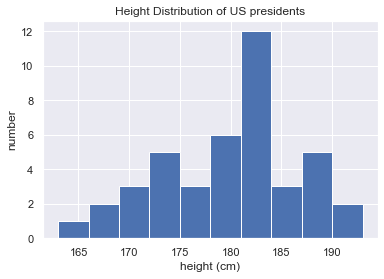

In [109]:
plt.hist(heights)
plt.title('Height Distribution of US presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

# 02.05 Computation on arrays broadcasting

In [111]:
a= np.array([0,1,2])
a+5 # add scalar to an array

array([5, 6, 7])

In [114]:
M = np.ones((3,3))

In [115]:
M +a

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [121]:
#rules of broadcasting

M = np.ones((4,3))

N = np.arange(3)

M+N

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [122]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [123]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [124]:
M = np.ones((3, 2))
a = np.arange(3)

In [126]:
a.reshape(3,1)

array([[0],
       [1],
       [2]])

In [125]:
a[:,np.newaxis]

array([[0],
       [1],
       [2]])

In [136]:
X = np.random.random((10,3))
Xmean = X.mean(0)

X_centered = X- Xmean

X_centered.mean(0)

array([-6.66133815e-17,  8.88178420e-17, -1.11022302e-17])

# 02.06 Boolean arrays and masks

In [137]:
rainfall = pd.read_csv(os.path.join(data_path,'Seattle2014.csv'))

In [145]:
rainfall_val= rainfall['PRCP'].values
rainfall_val

inches = rainfall_val/254

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

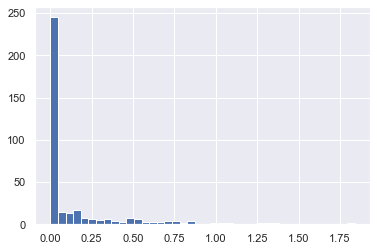

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
plt.hist(inches,40)

In [150]:
np.sum(inches>=0.5)

39

In [151]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [153]:
np.count_nonzero(x<6)

8

In [154]:
np.sum(x<6, axis=1) #in each row

array([4, 2, 2])

In [155]:
np.any(x<8)
np.all(x<10)

True

In [158]:
np.sum((inches>0.5)&(inches<1))

#same result as
np.sum(~((inches<=0.5)|(inches>=1)))

29

Boolean arrays as masks

A more powerful pattern is to use boolean arrays as masks, to select particular subsets of the data themselves.  To select the values from the array, we can simply index on this boolean array, this is known as a masking operation

In [161]:
inches[inches>0.75]

array([0.83858268, 0.8503937 , 1.03937008, 0.7519685 , 1.83858268,
       1.27165354, 1.09055118, 0.87007874, 1.31102362, 0.75984252,
       0.8503937 , 0.7992126 , 1.25984252, 1.        , 1.3503937 ,
       0.77165354, 0.81102362])

In [162]:
rainy= (inches>0)

days= np.arange(365)
summer = (days>172) &(days<262)

In [165]:
print("Median precip on rainy days:", np.median(inches[rainy]))
print("Median precip on summer days:", np.median(inches[summer]))
print("Median precip on non-summer rainy days", np.median(inches[(~summer) & rainy]))

Median precip on rainy days: 0.19488188976377951
Median precip on summer days: 0.0
Median precip on non-summer rainy days 0.20078740157480315


In [166]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [167]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

and and or perform a signle boolean evaluation on an entire object, while & and | perform multiple boolean evaluation on the content of an object; later one is nearly always the desired operation

# 02.07 Fancy indexing

Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars

In [168]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [170]:
ind = [3,7,4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index defined by the array rather than the shape of array being indexed

In [175]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [176]:
row = np.array([0,1,2])
col = np.array([2,1,3])

X[row, col]

array([ 2,  5, 11])

In [177]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

## Modifying values with fancy indexing

In [181]:
x = np.arange(10)
i = np.array([2,1,8,4])

x[i]=99
x

x[i]+=10
x

array([  0, 109, 109,   3, 109,   5,   6,   7, 109,   9])

# Sorting arrays

In [183]:
x = np.array([2, 1, 4, 3, 5])
#return a sorted version without modifyig the input
print(np.sort(x))
print(x)

x.sort()
print(x)

[1 2 3 4 5]
[2 1 4 3 5]
[1 2 3 4 5]


In [186]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(x[i])
print(x)

[1 2 3 4 5]
[2 1 4 3 5]


In [187]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [188]:
#sort along column
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [189]:
np.sort(X, axis =1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Keep in mind that this treats each row or column as an independent array, and any relationships between the row or column values will be lost!

## Example: k-NN

In [190]:
X = rand.rand(10,2)

In [209]:
a= rand.random_integers(5,7)
a

C:\Users\miaoxi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(5, 7 + 1) instead
  """Entry point for launching an IPython kernel.


6

In [214]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences

array([[[ 0.        ,  0.        ],
        [-0.51770836, -0.37679855],
        [-0.03959936, -0.95069309],
        [-0.22570504, -0.06754401],
        [-0.6113197 , -0.35939957],
        [-0.97616458, -0.44370047],
        [-0.8528741 , -0.65724511],
        [-0.44343295,  0.00979746],
        [-0.93513545, -0.54022579],
        [-0.3783502 ,  0.00709617]],

       [[ 0.51770836,  0.37679855],
        [ 0.        ,  0.        ],
        [ 0.478109  , -0.57389455],
        [ 0.29200332,  0.30925454],
        [-0.09361135,  0.01739898],
        [-0.45845623, -0.06690192],
        [-0.33516575, -0.28044657],
        [ 0.07427541,  0.38659601],
        [-0.4174271 , -0.16342725],
        [ 0.13935816,  0.38389472]],

       [[ 0.03959936,  0.95069309],
        [-0.478109  ,  0.57389455],
        [ 0.        ,  0.        ],
        [-0.18610568,  0.88314908],
        [-0.57172035,  0.59129353],
        [-0.93656522,  0.50699263],
        [-0.81327474,  0.29344798],
        [-0.40383359,  0

In [216]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences

array([[[0.00000000e+00, 0.00000000e+00],
        [2.68021941e-01, 1.41977145e-01],
        [1.56810915e-03, 9.03817359e-01],
        [5.09427629e-02, 4.56219322e-03],
        [3.73711781e-01, 1.29168048e-01],
        [9.52897288e-01, 1.96870105e-01],
        [7.27394233e-01, 4.31971139e-01],
        [1.96632778e-01, 9.59902985e-05],
        [8.74478311e-01, 2.91843907e-01],
        [1.43148872e-01, 5.03556687e-05]],

       [[2.68021941e-01, 1.41977145e-01],
        [0.00000000e+00, 0.00000000e+00],
        [2.28588213e-01, 3.29354951e-01],
        [8.52659388e-02, 9.56383688e-02],
        [8.76308468e-03, 3.02724521e-04],
        [2.10182111e-01, 4.47586710e-03],
        [1.12336078e-01, 7.86502769e-02],
        [5.51683628e-03, 1.49456475e-01],
        [1.74245380e-01, 2.67084648e-02],
        [1.94206961e-02, 1.47375156e-01]],

       [[1.56810915e-03, 9.03817359e-01],
        [2.28588213e-01, 3.29354951e-01],
        [0.00000000e+00, 0.00000000e+00],
        [3.46353231e-02, 7.799

In [218]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

# Structured data: numpy structured arrays

In [219]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

In [220]:
data= np.zeros(4, dtype={'names':('name','age','weight'),
                        'formats':('U10','i4','f8')})

In [221]:
data['name']=name
data['age']=age
data['weight']=weight

In [226]:
print(data[0])
print(data['name'])
print(data['name'][-1])
print(data[data['age']<30]['name'])

('Alice', 25, 55.)
['Alice' 'Bob' 'Cathy' 'Doug']
Doug
['Alice' 'Doug']
